In [1]:
pip install hydrobr

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plot

     ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/78.6 kB ? eta -:--:--
     ------------------- ------------------ 41.0/78.6 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 78.6/78.6 kB 735.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/135.1 kB ? eta -:--:--
   ---------------------------------------- 135.1/135.1 kB 7.8 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26327 sha256=b931017ee41a94f4bb3b9980523db23823acb1b187bd069d2ab48339a838d2cb
  Stored in directory: c:\users\marcos\appdata\local\pip\cache\wheels\12\98\52\2bffe242a9a487f00886e43b8ed8dac46456702e11a0d6abef
Successfully built typing
Note: you may need to restart the kernel to use updated packages.


In [121]:
import PIL
import hydrobr
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image

In [122]:
lista_estacoes = hydrobr.get_data.ANA.list_prec_stations()
#lista_estacoes.head()
display(lista_estacoes)

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,NOVA ESPERANÇA/MARCO BV-8,08461000,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984/03/23,2019/06/30,36,12.3,13,63.9
11972,MISSÃO AUARIS - JUSANTE,08464001,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995/04/01,2019/06/30,25,4.2,15,40.0
11973,WILLIAM KRAANPLEIN,08555060,2,90,SURINAME,SURINAME,SURINAME,5.8000,-55.1667,1935/08/01,1948/12/31,14,9.2,7,50.0
11974,ZANDERIJ,08555096,2,90,SURINAME,SURINAME,SURINAME,5.4700,-55.2000,2009/01/31,2010/01/31,2,96.7,0,100.0


In [123]:
#Filtrar para a cidade desejada
lista_estacoes_city = lista_estacoes[lista_estacoes["City"] == "JOINVILLE"]

#Exibir colunas
display(lista_estacoes_city[["Code", "City", "Latitude", "Longitude", "StartDate", "EndDate"]])


,Code,City,Latitude,Longitude,StartDate,EndDate
10950,02648003,JOINVILLE,-26.3667,-48.9833,1985/01/01,1989/12/31
10952,02648005,JOINVILLE,-26.3000,-48.8500,1952/06/01,1989/12/31
10958,02648014,JOINVILLE,-26.3217,-48.8464,1938/05/01,2019/08/31
10961,02648021,JOINVILLE,-26.2500,-48.9667,1952/10/01,1968/12/31
10965,02648028,JOINVILLE,-26.4483,-48.8303,1977/05/01,2019/08/31
10969,02648033,JOINVILLE,-26.1800,-48.9394,1987/05/01,2019/07/31
10970,02648034,JOINVILLE,-26.2489,-48.9775,1987/01/01,2019/07/31
10971,02648035,JOINVILLE,-26.2500,-48.8500,1989/01/01,1991/10/31
10987,02649014,JOINVILLE,-26.2667,-49.1167,1946/02/16,1971/01/31
11007,02649042,JOINVILLE,-26.1833,-49.0833,1949/11/23,1972/12/31


In [136]:
# Realizando o melt do DataFrame
data_stations_melt = pd.melt(data_stations_index, 
                             id_vars='index', 
                             value_vars=codigo_estacao, 
                             var_name="Estacao", 
                             value_name="Precipitacao")

# Mapeando latitude, longitude, data início, data fim, responsabilidade e nome da estação
latitude_map = dict(zip(lista_estacoes_city["Code"], lista_estacoes_city["Latitude"]))
longitude_map = dict(zip(lista_estacoes_city["Code"], lista_estacoes_city["Longitude"]))
datainicio_map = dict(zip(lista_estacoes_city["Code"], lista_estacoes_city["StartDate"]))
datafim_map = dict(zip(lista_estacoes_city["Code"], lista_estacoes_city["EndDate"]))
responsibilidade_map = dict(zip(lista_estacoes_city["Code"], lista_estacoes_city["Responsible"]))
estacao_nome_map = dict(zip(lista_estacoes_city["Code"], lista_estacoes_city["Name"]))

# Adicionando as colunas ao DataFrame
data_stations_melt['Latitude'] = data_stations_melt['Estacao'].map(latitude_map)
data_stations_melt['Longitude'] = data_stations_melt['Estacao'].map(longitude_map)
data_stations_melt['StartDate'] = data_stations_melt['Estacao'].map(datainicio_map)
data_stations_melt['EndDate'] = data_stations_melt['Estacao'].map(datafim_map)
data_stations_melt['Responsible'] = data_stations_melt['Estacao'].map(responsibilidade_map)
data_stations_melt['Name'] = data_stations_melt['Estacao'].map(estacao_nome_map)

# Exibir as primeiras linhas para verificar
display(data_stations_melt.head())

# Salvar o DataFrame como arquivo CSV
data_stations_melt.to_csv('precipitacao_geral.csv', index=False)

# Exibir uma mensagem de sucesso
display("Arquivo CSV salvo com sucesso!")


,index,Estacao,Precipitacao,Latitude,Longitude,StartDate,EndDate,Responsible,Name
0,0,02648003,NaN,-26.3667,-48.9833,1985/01/01,1989/12/31,DNOS,POSTO ESTRADA BLUMENAU KM 18
1,1,02648003,NaN,-26.3667,-48.9833,1985/01/01,1989/12/31,DNOS,POSTO ESTRADA BLUMENAU KM 18
2,2,02648003,NaN,-26.3667,-48.9833,1985/01/01,1989/12/31,DNOS,POSTO ESTRADA BLUMENAU KM 18
3,3,02648003,NaN,-26.3667,-48.9833,1985/01/01,1989/12/31,DNOS,POSTO ESTRADA BLUMENAU KM 18
4,4,02648003,NaN,-26.3667,-48.9833,1985/01/01,1989/12/31,DNOS,POSTO ESTRADA BLUMENAU KM 18


'Arquivo CSV salvo com sucesso!'

In [139]:
# Garantir que a coluna de precipitação esteja no formato numérico
data_stations_melt['Precipitacao'] = pd.to_numeric(data_stations_melt['Precipitacao'], errors='coerce')

# Agrupar por 'Name' e calcular a média da precipitação
# Também obtendo as datas de início (StartDate), fim (EndDate), latitude e longitude para cada estação
precipitacao_media_nome = data_stations_melt.groupby('Name').agg(
    Precipitacao=('Precipitacao', 'mean'),
    StartDate=('StartDate', 'min'),
    EndDate=('EndDate', 'max'),
    Latitude=('Latitude', 'first'),
    Longitude=('Longitude', 'first')
).reset_index()

# Exibir as primeiras linhas para verificar
display(precipitacao_media_nome)

# Salvar o resultado como CSV
precipitacao_media_nome.to_csv('precipitacao_media_por_estacao_com_datas_lat_lon.csv', index=False)

# Exibir uma mensagem de sucesso
display("Arquivo CSV com precipitação média por estação, datas, latitude e longitude salvo com sucesso!")



,Name,Precipitacao,StartDate,EndDate,Latitude,Longitude
0,ESTRADA DOS MORROS,14.651067,1987/01/01,2019/07/31,-26.2489,-48.9775
1,JOINVILLE,7.822137,1952/06/01,1989/12/31,-26.3000,-48.8500
2,JOINVILLE (RVPSC),7.516444,1938/05/01,2019/08/31,-26.3217,-48.8464
3,JOINVILLE - FUND.,13.603226,1989/01/01,1991/10/31,-26.2500,-48.8500
4,PIRABEIRABA,11.552801,1987/05/01,2019/07/31,-26.1800,-48.9394
5,PONTE SC-301,8.101342,1977/05/01,2019/08/31,-26.4483,-48.8303
6,POSTO ESTRADA BLUMENAU KM 18,11.943226,1985/01/01,1989/12/31,-26.3667,-48.9833
7,PRIMEIRO SALTO DO CUBATÃO,10.074298,1981/04/01,2019/08/31,-26.2158,-49.0806
8,RIO DO JÚLIO,7.960935,1946/02/16,1971/01/31,-26.2667,-49.1167
9,SEGUNDO SALTO CUBATÃO,6.441886,1949/11/23,1972/12/31,-26.1833,-49.0833


'Arquivo CSV com precipitação média por estação, datas, latitude e longitude salvo com sucesso!'

Text(0, 0.5, 'Precipitação em mm/dia')

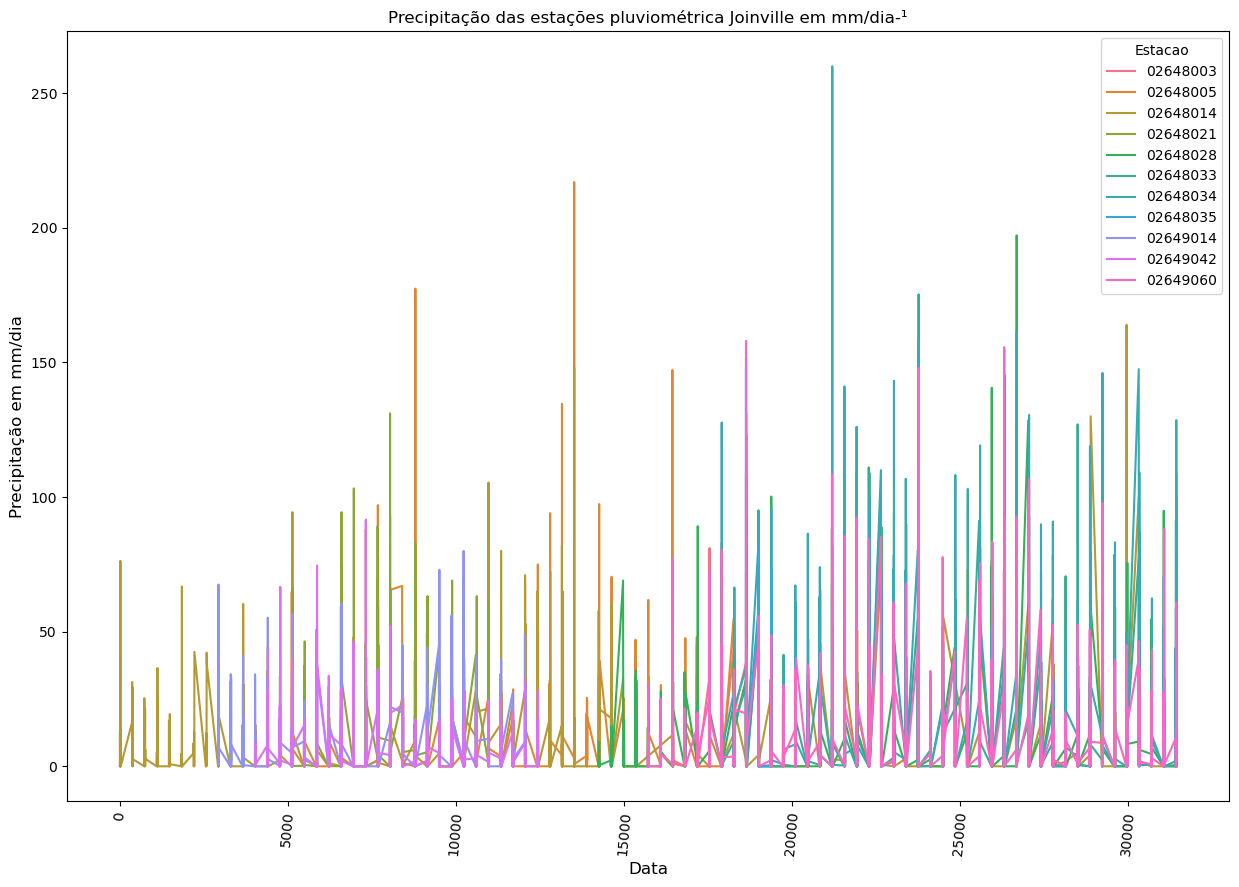

In [140]:
fig, ax = plt.subplots(1,1,figsize=(15,10), dpi=100)
from matplotlib import rc
rc('mathtext', default='regular')
plt.xticks(fontsize=10,rotation=85)
plt.yticks(fontsize=10)
sns.lineplot(x="index", y="Precipitacao", hue="Estacao", data=data_stations_melt)\
            .set(title='Precipitação das estações pluviométrica Joinville em mm/dia-¹')

plt.xlabel('Data',fontsize=12)
#precipitação em milímetros por dia
plt.ylabel('Precipitação em mm/dia', fontsize=12)